#Downloading the Dataset

In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kairavnandi
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python


100%|██████████| 1.55k/1.55k [00:00<00:00, 1.13MB/s]

#Importing Required Libraries

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler as ss
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score as sil

#Converting Dataset into a Dataframe to perform operations

In [4]:
df = pd.read_csv("/content/customer-segmentation-tutorial-in-python/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df = df.drop('CustomerID', axis = 1)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [9]:
df['Gender'] = df['Gender'].map({'Male':0, 'Female':1})
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


#Visualising Dataset

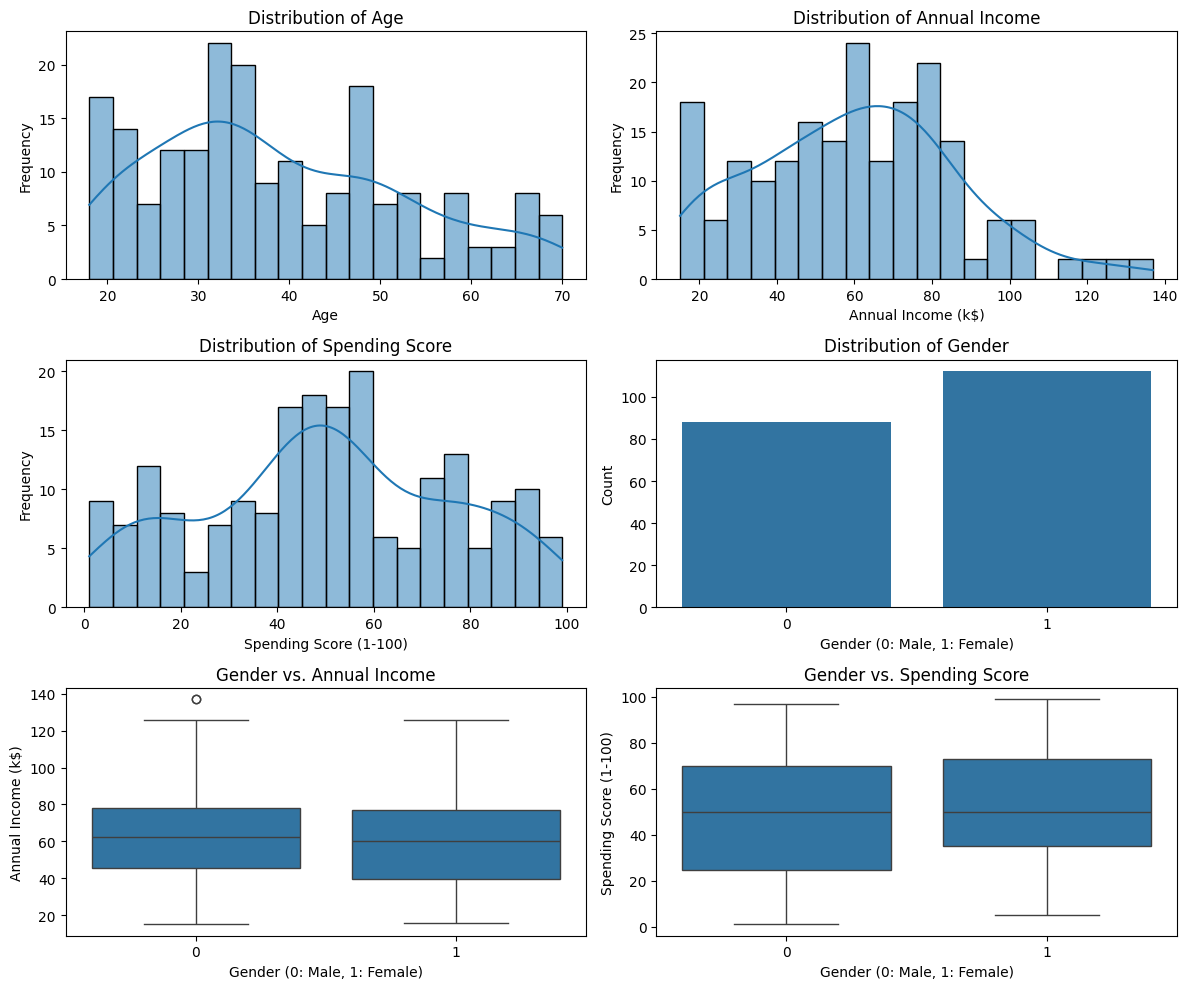

In [10]:
plt.figure(figsize = (12, 10))

plt.subplot(3, 2, 1)
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(3, 2, 2)
sns.histplot(df['Annual Income (k$)'], bins=20, kde=True)
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')

plt.subplot(3, 2, 3)
sns.histplot(df['Spending Score (1-100)'], bins=20, kde=True)
plt.title('Distribution of Spending Score')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Frequency')

plt.subplot(3, 2, 4)
sns.countplot(x='Gender', data=df)
plt.title('Distribution of Gender')
plt.xlabel('Gender (0: Male, 1: Female)')
plt.ylabel('Count')

plt.subplot(3, 2, 5)
sns.boxplot(x='Gender', y='Annual Income (k$)', data=df)
plt.title('Gender vs. Annual Income')
plt.xlabel('Gender (0: Male, 1: Female)')
plt.ylabel('Annual Income (k$)')

plt.subplot(3, 2, 6)
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=df)
plt.title('Gender vs. Spending Score')
plt.xlabel('Gender (0: Male, 1: Female)')
plt.ylabel('Spending Score (1-100)')

plt.tight_layout()
plt.show()

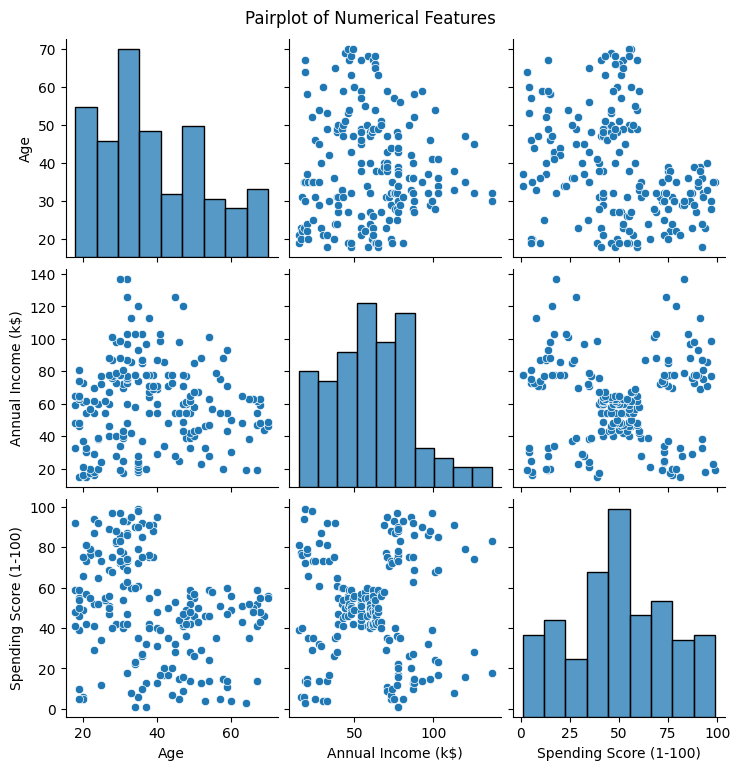

In [11]:
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

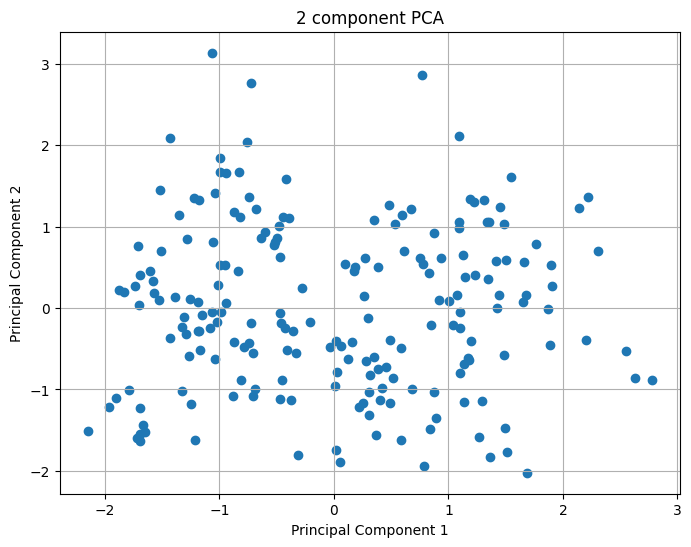

In [12]:
scaler = ss()
df_scaled = scaler.fit_transform(df)

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(data = df_pca, columns = ['principal component 1', 'principal component 2'])

plt.figure(figsize = (8, 6))
plt.scatter(df_pca['principal component 1'], df_pca['principal component 2'])
plt.title('2 component PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()

#Fitting K-Means and Assigning Cluster Labels

In [26]:
kmeans = KMeans(n_clusters = 5, random_state = 42, n_init = 10)
kmeans.fit(df_pca)
df['Cluster'] = kmeans.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,0,19,15,39,1
1,0,21,15,81,0
2,1,20,16,6,1
3,1,23,16,77,0
4,1,31,17,40,1


#Using Elbow Method to find Optimal K

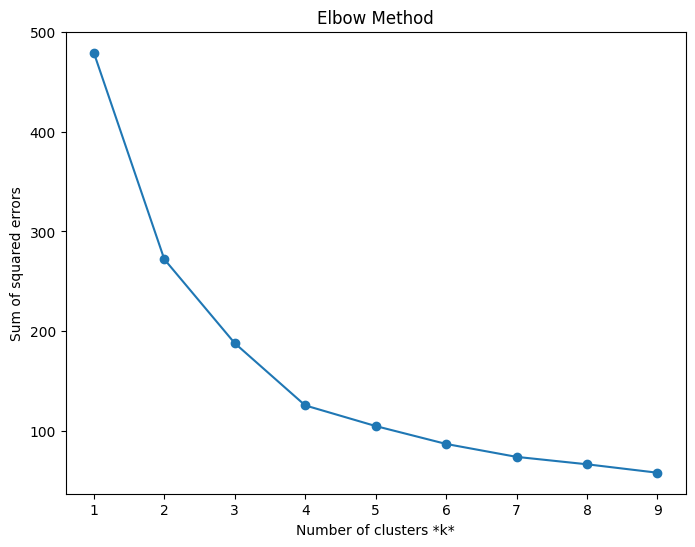

In [18]:
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters = k, random_state = 42, n_init = 10)
    km.fit(df_pca)
    sse.append(km.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared errors')
plt.title('Elbow Method')
plt.show()

#Visualising Clusters

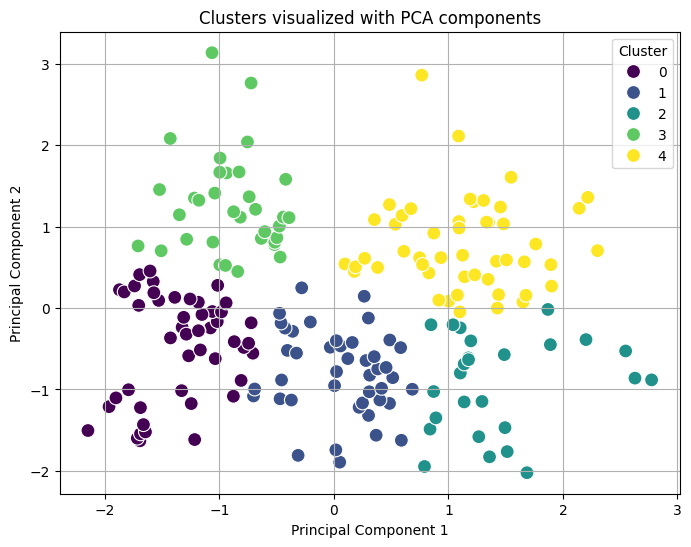

In [27]:
plt.figure(figsize = (8, 6))
sns.scatterplot(x = df_pca['principal component 1'], y = df_pca['principal component 2'], hue = df['Cluster'], palette = 'viridis', s = 100)
plt.title('Clusters visualized with PCA components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title = 'Cluster')
plt.grid(True)
plt.show()

#Evaluating Clustering

In [32]:
score = sil(df_pca, df['Cluster'])
print("Silhouette Score:", round(score, 2))

Silhouette Score: 0.39
